# Averil project memento

In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse
import scipy.stats as stats
from pybedtools import BedTool
import pickle as pkl
%matplotlib inline
import itertools

import statsmodels.formula.api as smf
import statsmodels.api as sm
pd.set_option('display.max_rows', 600)

In [2]:
import functools

In [3]:
import sys
sys.path.append('/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.9-py3.8.egg')
sys.path.append('/home/ssm-user/Github/misc-seq/miscseq')
import encode
import memento

In [4]:
data_path = '/data_volume/averil/'
# fig_path = '/data/home/Github/scrna-parameter-estimation/figures/fig6/'

In [5]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

### Get a list of mouse TFs

In [6]:
tfs = '0610010K14Rik,Adnp,Aebp1,Aebp2,Ahctf1,Ahr,Ahrr,Alx1,Alx3,Alx4,Ar,Arid1a,Arid1b,Arid2,Arid3a,Arid3c,Arid5a,Arid5b,Arnt,Arnt2,Arntl,Arntl2,Arx,Ascl1,Ascl2,Ascl3,Atf1,Atf2,Atf3,Atf4,Atf6,Atf7,Atmin,Atoh1,Atoh8,Bach1,Bach2,Barhl1,Barhl2,Barx1,Barx2,Batf,Batf3,Baz2a,Baz2b,Bbx,Bcl11a,Bcl11b,Bcl6,Bcl6b,Bdp1,Bhlha15,Bhlhe22,Bhlhe23,Bhlhe40,Bhlhe41,Bnc1,Bnc2,Bptf,Bsx,Bzw1,Carhsp1,Casz1,Cbfb,Cbx2,Cdc5l,Cdx1,Cdx2,Cebpa,Cebpb,Cebpd,Cebpe,Cebpg,Cebpz,Chd6,Chd7,Cic,Clock,Cramp1l,Creb1,Creb3,Creb3l1,Creb3l2,Creb3l3,Creb3l4,Creb5,Crem,Crx,Csde1,Ctcf,Ctcfl,Cux1,Cux2,D3Ertd254e,Dach1,Dach2,Dbp,Deaf1,Dlx1,Dlx2,Dlx3,Dlx5,Dlx6,Dmap1,Dmrt1,Dmrt2,Dmrt3,Dmrtc2,Dmtf1,Dnajc1,Dnajc2,Dot1l,Dr1,Drap1,Dzip1,Dzip1l,E2f1,E2f2,E2f3,E2f4,E2f5,E2f6,E2f7,E2f8,E4f1,Ebf1,Ebf2,Ebf3,Egr1,Egr2,Egr3,Ehf,Elf1,Elf2,Elf3,Elf4,Elf5,Elk1,Elk3,Elk4,Emx1,Emx2,En1,En2,Eomes,Ep400,Epas1,Erf,Erg,Esr1,Esrra,Esrrb,Esrrg,Esx1,Ets1,Ets2,Etv1,Etv3,Etv6,Evx1,Ezh1,Ezh2,Fev,Figla,Fiz1,Fli1,Fos,Fosb,Fosl1,Fosl2,Foxa1,Foxa2,Foxa3,Foxb1,Foxc1,Foxc2,Foxd2,Foxe1,Foxe3,Foxf1,Foxf2,Foxg1,Foxi1,Foxi2,Foxi3,Foxj1,Foxj2,Foxj3,Foxk1,Foxk2,Foxl2,Foxm1,Foxn2,Foxn3,Foxo1,Foxo3,Foxo4,Foxo6,Foxp1,Foxp2,Foxp3,Foxp4,Foxq1,Gabpa,Gata1,Gata2,Gata3,Gata4,Gata5,Gata6,Gatad1,Gatad2a,Gatad2b,Gbx1,Gbx2,Gcm1,Gfi1,Gfi1b,Gli1,Gli3,Gm14420,Gm1862,Gm5595,Gm8898,Gmeb1,Gmeb2,Gon4l,Grhl1,Grhl2,Grhl3,Gsc2,Gsx1,Gzf1,Hand1,Hand2,Hes1,Hes3,Hes5,Hes6,Hes7,Hey1,Heyl,Hhex,Hic2,Hif1a,Hif3a,Hinfp,Hivep1,Hivep2,Hivep3,Hlf,Hmbox1,Hmg20a,Hmg20b,Hmga1,Hmga1-rs1,Hmga2,Hmgb2,Hmgb3,Hmgb4,Hmgn3,Hmgn5,Hmgxb3,Hmgxb4,Hmx1,Hmx2,Hmx3,Hnf1a,Hnf1b,Hnf4a,Hnf4g,Homez,Hoxa10,Hoxa11,Hoxa13,Hoxa3,Hoxa4,Hoxa5,Hoxa7,Hoxa9,Hoxb13,Hoxb3,Hoxb4,Hoxb5,Hoxb6,Hoxb7,Hoxb8,Hoxb9,Hoxc10,Hoxc11,Hoxc13,Hoxc4,Hoxc5,Hoxc6,Hoxc8,Hoxc9,Hoxd10,Hoxd11,Hoxd12,Hoxd13,Hoxd3,Hoxd4,Hoxd8,Hoxd9,Hsf1,Hsf2,Hsf4,Hsfy2,Ikzf1,Ikzf2,Ikzf3,Ikzf4,Ikzf5,Irf1,Irf2,Irf3,Irf4,Irf5,Irf6,Irf7,Irf8,Irf9,Irx1,Irx2,Irx3,Irx6,Isl1,Isx,Jazf1,Jdp2,Jun,Junb,Jund,Kin,Klf12,Klf13,Klf15,Klf16,Klf17,Klf2,Klf3,Klf4,Klf5,Klf7,Klf9,Lbx1,Lef1,Lhx1,Lhx2,Lhx3,Lhx4,Lhx5,Lhx6,Lhx9,Lin28a,Lin28b,Lmx1b,Lyl1,Mael,Maf,Mafb,Maff,Mafg,Mafk,Max,Maz,Mecom,Mef2a,Mef2c,Mef2d,Meis1,Meis2,Meox1,Meox2,Mga,Mier1,Mier2,Mitf,Mkx,Mlx,Mlxip,Mlxipl,Mnt,Mnx1,Mrpl28,Msx1,Msx2,Mta1,Mta2,Mta3,Mxd1,Mxd3,Mxd4,Mxi1,Myb,Mybl1,Mybl2,Myc,Mycl1,Mycn,Myf6,Myod1,Myog,Myrf,Mysm1,Myt1,Myt1l,Nab1,Nab2,Neurod1,Neurod2,Neurod4,Neurod6,Neurog2,Nfat5,Nfatc1,Nfatc2,Nfatc3,Nfatc4,Nfe2,Nfe2l1,Nfe2l2,Nfia,Nfib,Nfic,Nfil3,Nfix,Nfkb1,Nfkb2,Nfkbia,Nfkbib,Nfkbie,Nfrkb,Nfya,Nfyb,Nfyc,Nhlh1,Nhlh2,Nkx1-2,Nkx2-1,Nkx2-2,Nkx2-3,Nkx2-4,Nkx2-5,Nkx2-6,Nkx2-9,Nkx3-1,Nkx3-2,Nkx6-1,Nkx6-2,Nkx6-3,Noc3l,Noc4l,Notch1,Notch2,Notch3,Notch4,Npas1,Npas2,Npas3,Npas4,Nr0b1,Nr0b2,Nr1d1,Nr1d2,Nr1h2,Nr1h3,Nr1h4,Nr1i2,Nr1i3,Nr2c1,Nr2c2,Nr2e1,Nr2e3,Nr2f1,Nr2f2,Nr2f6,Nr3c1,Nr3c2,Nr4a1,Nr4a2,Nr4a3,Nr5a1,Nr5a2,Nr6a1,Nrf1,Nrk,Nrl,Olig1,Olig2,Olig3,Onecut1,Onecut2,Onecut3,Osr1,Otp,Otx1,Otx2,Ovol1,Ovol2,Patz1,Pax1,Pax2,Pax3,Pax5,Pax6,Pax7,Pax8,Pax9,Pbx1,Pbx2,Pbx3,Pbx4,Pds5b,Pdx1,Peg3,Pgr,Phox2a,Phox2b,Phtf1,Phtf2,Pitx1,Pitx2,Pitx3,Pknox1,Pknox2,Plag1,Plagl2,Pou2af1,Pou2f1,Pou2f2,Pou2f3,Pou3f1,Pou3f2,Pou3f3,Pou3f4,Pou4f1,Pou4f2,Pou4f3,Pou5f2,Pou6f2,Ppara,Ppard,Pparg,Prdm1,Prdm10,Prdm12,Prdm15,Prdm16,Prdm6,Prox1,Prox2,Prr12,Prrx1,Prrx2,Ptf1a,Rara,Rarb,Rarg,Rax,Rb1,Rbl1,Rbl2,Rbpj,Rbpjl,Rel,Rela,Relb,Repin1,Rere,Rest,Rex2,Rfx1,Rfx2,Rfx3,Rfx4,Rfx5,Rfx6,Rfx7,Rfx8,Rfxank,Rlf,Rora,Rorb,Rorc,Rreb1,Runx1,Runx2,Runx3,Rxra,Rxrb,Rxrg,Rybp,Sall1,Sall2,Sall4,Satb1,Satb2,Scrt2,Scx,Sebox,Setbp1,Shox2,Sim1,Sim2,Six1,Six2,Six3,Six4,Six5,Six6,Ski,Skil,Skor1,Smad1,Smad2,Smad3,Smad4,Smad5,Smad9,Smarca1,Smarca5,Smarcc1,Smarcc2,Smarce1,Sohlh1,Sohlh2,Sox1,Sox10,Sox11,Sox13,Sox14,Sox15,Sox17,Sox18,Sox2,Sox21,Sox3,Sox30,Sox4,Sox5,Sox6,Sox7,Sox8,Sox9,Sp1,Sp2,Sp3,Sp4,Sp8,Spdef,Spib,Spic,Srebf1,Srebf2,Srf,Ssrp1,St18,Stat1,Stat2,Stat3,Stat4,Stat5a,Stat5b,Stat6,Tada2a,Tada2b,Tal1,Tbp,Tbpl1,Tbr1,Tbx1,Tbx15,Tbx19,Tbx2,Tbx20,Tbx21,Tbx22,Tbx3,Tbx4,Tbx5,Tbx6,Tcf12,Tcf15,Tcf20,Tcf21,Tcf23,Tcf3,Tcf4,Tcf7,Tcf7l1,Tcf7l2,Tcfl5,Tead1,Tead2,Tead3,Tead4,Tef,Terf1,Terf2,Terf2ip,Tfam,Tfap2a,Tfap2b,Tfap2c,Tfap2d,Tfap2e,Tfap4,Tfcp2,Tfcp2l1,Tfdp1,Tfdp2,Tfe3,Tfeb,Tfec,Tgif1,Tgif2,Tgif2lx2,Thra,Thrb,Tlx1,Tlx3,Tox,Tox2,Tox4,Trerf1,Trp53,Trp63,Trp73,Trps1,Tsc22d2,Tsc22d3,Tsc22d4,Tshz1,Tshz2,Tshz3,Ttf1,Tub,Tulp1,Tulp2,Twist1,Twist2,Ubp1,Ubtf,Usf1,Usf2,Vax1,Vax2,Vdr,Vezf1,Vsx1,Vsx2,Wdhd1,Wiz,Wt1,Xbp1,Ybx1,Ybx2,Yeats4,Yy1,Yy2,Zbed4,Zbtb1,Zbtb11,Zbtb16,Zbtb17,Zbtb2,Zbtb20,Zbtb24,Zbtb26,Zbtb34,Zbtb37,Zbtb38,Zbtb40,Zbtb41,Zbtb43,Zbtb44,Zbtb45,Zbtb48,Zbtb7a,Zbtb7b,Zbtb9,Zdhhc13,Zdhhc6,Zeb1,Zeb2,Zfat,Zfhx3,Zfhx4,Zfp1,Zfp110,Zfp111,Zfp143,Zfp146,Zfp148,Zfp157,Zfp161,Zfp169,Zfp184,Zfp189,Zfp191,Zfp2,Zfp207,Zfp212,Zfp217,Zfp219,Zfp236,Zfp260,Zfp266,Zfp273,Zfp276,Zfp277,Zfp280b,Zfp280c,Zfp280d,Zfp281,Zfp287,Zfp292,Zfp3,Zfp317,Zfp319,Zfp329,Zfp335,Zfp354a,Zfp354c,Zfp358,Zfp362,Zfp37,Zfp384,Zfp386,Zfp395,Zfp397,Zfp41,Zfp414,Zfp418,Zfp42,Zfp422,Zfp426,Zfp438,Zfp444,Zfp445,Zfp446,Zfp451,Zfp462,Zfp507,Zfp51,Zfp512,Zfp516,Zfp518a,Zfp518b,Zfp521,Zfp523,Zfp524,Zfp536,Zfp541,Zfp551,Zfp553,Zfp566,Zfp574,Zfp579,Zfp580,Zfp592,Zfp593,Zfp595,Zfp605,Zfp607,Zfp608,Zfp609,Zfp612,Zfp616,Zfp617,Zfp618,Zfp623,Zfp628,Zfp629,Zfp644,Zfp646,Zfp647,Zfp648,Zfp652,Zfp653,Zfp655,Zfp668,Zfp672,Zfp687,Zfp691,Zfp692,Zfp7,Zfp704,Zfp706,Zfp707,Zfp709,Zfp710,Zfp715,Zfp735,Zfp746,Zfp768,Zfp771,Zfp775,Zfp787,Zfp791,Zfp800,Zfp804b,Zfp821,Zfp827,Zfp831,Zfp84,Zfp867,Zfp869,Zfp9,Zfp91,Zfp963,Zfpm1,Zfpm2,Zfx,Zhx1,Zhx2,Zhx3,Zic1,Zic2,Zic3,Zkscan1,Zkscan3,Zkscan4,Znf512b,Zscan18,Zscan20,Zscan21,Zscan22,Zxdc,Zzz3,Zfp819,AU041133,Zfp719,Zfp712,Mis18bp1,Zfp828,Zfp658,Zfp238,Sfpi1,1700049G17Rik'.split(',')

### Read the data

Recover the raw count data

In [7]:
adata_norm = sc.read(data_path + '20220530_foheme.h5ad')

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/anndata/compat/__init__.py:179: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [8]:
ncounts = adata_norm.obs.nCount_RNA.values

In [9]:
prop = adata_norm.raw.X.expm1()/10000

In [10]:
raw_counts = sparse.diags(ncounts)*prop

In [11]:
adata = sc.AnnData(X=raw_counts, obs=adata_norm.obs, var=adata_norm.raw.var)

### Setup memento

In [12]:
adata.obs['q'] = 0.1

In [13]:
memento.setup_memento(adata, q_column='q', trim_percent=0.1, filter_mean_thresh=0.07)

### Cell counts

In [14]:
adata.obs.head(5)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,nCount_HTO,nFeature_HTO,percent.mt,HTOsample,cell,seurat_clusters,Phase,q,memento_size_factor
AAACCTGAGAGTACAT-1,0,578.0,370,1779.0,129,327.0,2,7.093426,0,0,4,S,0.1,0.735249
AAACCTGAGCACGCCT-1,0,651.0,415,12832.0,138,1135.0,2,9.062980,0,0,2,S,0.1,0.778055
AAACCTGAGCCATCGC-1,0,704.0,449,1790.0,130,253.0,2,3.551136,0,0,0,S,0.1,0.891364
AAACCTGAGCCCAATT-1,0,1388.0,674,1154.0,122,458.0,2,3.890490,0,0,1,G1,0.1,1.374815
AAACCTGAGCTGAACG-1,0,780.0,495,1658.0,129,233.0,2,3.333333,0,0,0,S,0.1,0.863666


In [15]:
adata.obs.groupby('cell').size()

cell
0     7084
1    13087
dtype: int64

In [16]:
adata.obs.groupby(['seurat_clusters', 'cell']).size().reset_index()

,seurat_clusters,cell,0
0,0,0,1524
1,0,1,1119
2,1,0,1521
3,1,1,1040
4,2,0,1458
5,2,1,946
6,3,0,88
7,3,1,2269
8,4,0,779
9,4,1,1213


In [17]:
sc.pp.neighbors(adata_norm)

In [18]:
sc.tl.umap(adata_norm)

In [19]:
for g in adata_norm.raw.var.index.tolist():
    if 'Cd3' in g:
        print(g)

Cd34
Cd302
Cd36
Cd38
Cd3eap
Cd33
Cd37
Cd3g
Cd3d
Cd3e
Cd300lg
Cd300a
Cd300lb
Cd300c
Cd300ld
Cd300c2
Cd300e
Cd300lf
Cd320


In [20]:
adata_norm.obs['seurat_clusters'] = adata_norm.obs['seurat_clusters'].astype('category')

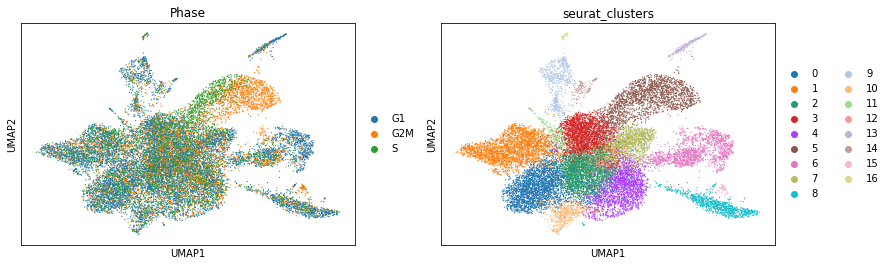

In [38]:
sc.pl.umap(adata_norm, color=['Phase','seurat_clusters'], use_raw=True)

In [ ]:
sc.pl.umap(adata_norm, color=['Cd3d', 'Il17a'], use_raw=True)

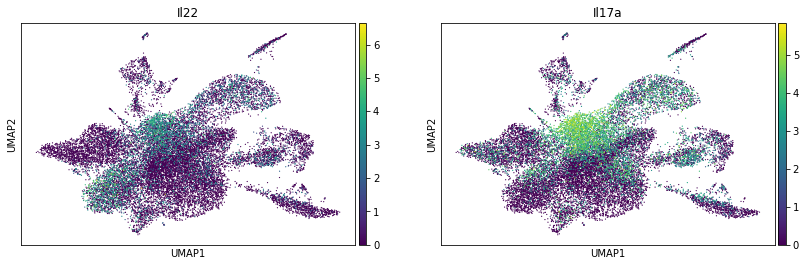

In [22]:
sc.pl.umap(adata_norm, color=['Il22', 'Il17a'], use_raw=True)

### T cell analysis

In [39]:
adata_T = adata.copy()[adata.obs.seurat_clusters.isin([3, 5, 7, 2])].copy()
memento.create_groups(adata_T, label_columns=['cell'])
memento.compute_1d_moments(adata_T, min_perc_group=.7)
memento.compute_2d_moments(adata_T, list(itertools.product(['Il22'],adata_T.var.index)))
meta_df = memento.get_groups(adata_T)
meta_df['intercept'] = 1
covariate = meta_df[['intercept']]
treatment = meta_df[['cell']]

In [40]:
adata_T.obs.cell.value_counts()

1    4486
0    1714
Name: cell, dtype: int64

In [41]:
memento.ht_2d_moments(
    adata_T, 
    covariate=covariate,
    treatment=treatment, 
    num_boot=5000, 
    verbose=1,
    num_cpus=14,
    resampling='bootstrap',
    resample_rep=False,
    approx=True)

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    3.7s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    7.3s
[Parallel(n_jobs=14)]: Done 422 tasks      | elapsed:   13.0s
[Parallel(n_jobs=14)]: Done 772 tasks      | elapsed:   21.1s
[Parallel(n_jobs=14)]: Done 1246 out of 1246 | elapsed:   32.5s finished


In [42]:
moments = memento.get_2d_moments(adata_T,groupby="cell")

In [43]:
df = memento.get_2d_ht_result(adata_T)
df = df.merge(moments, on=['gene_1', 'gene_2'])
df['tf'] = df['gene_2'].apply(lambda x: x in tfs)

(array([179., 118., 131., 131., 106., 119., 120., 125., 113., 104.]),
 array([9.14884158e-10, 9.98967817e-02, 1.99793562e-01, 2.99690343e-01,
        3.99587124e-01, 4.99483905e-01, 5.99380685e-01, 6.99277466e-01,
        7.99174247e-01, 8.99071028e-01, 9.98967808e-01]),
 <BarContainer object of 10 artists>)

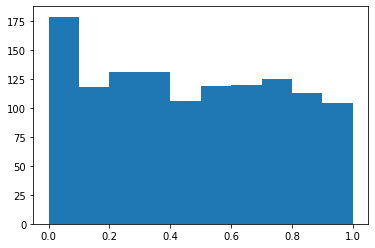

In [44]:
plt.hist(df['corr_pval'])

In [51]:
filtered_df = df.query('tf & (cell_0 > .1 | cell_1 > 0.1)').copy()

In [52]:
filtered_df['corr_fdr'] = memento.util._fdrcorrect(filtered_df['corr_pval'])

In [53]:
filtered_df.sort_values('corr_pval')

,gene_1,gene_2,corr_coef,corr_se,corr_pval,cell_0,cell_1,tf,corr_fdr
177,Il22,Gatad2b,0.250126,0.082268,0.002386,-0.125936,0.124189,True,0.073979
728,Il22,Rel,0.163047,0.060223,0.006968,-0.013533,0.149514,True,0.090202
156,Il22,Skil,0.250910,0.095451,0.008729,-0.007931,0.242979,True,0.090202
566,Il22,Nfatc3,0.153517,0.084834,0.071558,-0.023656,0.129861,True,0.477432
349,Il22,Tsc22d4,0.147974,0.083568,0.080172,-0.028384,0.119590,True,0.477432
541,Il22,Jund,-0.113397,0.069056,0.102414,0.212582,0.099185,True,0.477432
483,Il22,Klf13,-0.206178,0.128167,0.107807,0.165478,-0.040700,True,0.477432
799,Il22,Ikzf3,0.126678,0.085205,0.137088,0.000220,0.126898,True,0.519589
299,Il22,Fosl2,-0.152304,0.113101,0.179734,0.227010,0.074706,True,0.519589
593,Il22,Fli1,-0.176775,0.134840,0.191366,0.178408,0.001633,True,0.519589


In [88]:
df.query('gene_2 == "Il17a"')

,gene_1,gene_2,corr_coef,corr_se,corr_pval,tf,corr_fdr
19,Il22,Il17a,0.052828,0.072888,0.468713,False,0.891134


In [99]:
df

,gene_1,gene_2,corr_coef,corr_se,corr_pval,tf,corr_fdr,cell_0,cell_1
0,Il22,Mrpl15,0.008614,0.118837,0.942323,False,0.989956,0.059313,0.067927
1,Il22,Lypla1,0.024365,0.103908,0.816758,False,0.970286,0.063198,0.087563
2,Il22,Tcea1,0.033898,0.074887,0.651573,False,0.927747,0.027341,0.061239
3,Il22,Atp6v1h,0.056045,0.048410,0.246981,False,0.808427,-0.070258,-0.014213
4,Il22,Rb1cc1,-0.184087,0.166433,0.269270,False,0.823743,0.196952,0.012866
...,...,...,...,...,...,...,...,...,...
6674,Il22,mt-Cytb,-0.006031,0.061068,0.921346,False,0.988122,0.091761,0.085730
6675,Il22,CAAA01118383.1,0.135934,0.088120,0.122934,False,0.713873,-0.039213,0.096722
6676,Il22,Vamp7,-0.060265,0.114935,0.600232,False,0.920825,0.052172,-0.008093
6677,Il22,CAAA01147332.1,-0.095625,0.070208,0.173501,False,0.762064,0.020977,-0.074647


In [80]:
df.sort_values('corr_pval').head(30)

,gene_1,gene_2,corr_coef,corr_se,corr_pval,tf,corr_fdr
6357,Il22,Zfp91,0.246354,0.058981,0.000041,True,0.014218
2322,Il22,Etv6,0.197964,0.061685,0.001331,True,0.201529
2901,Il22,Irf2,0.238127,0.075488,0.001722,True,0.201529
3960,Il22,Rel,0.146855,0.048462,0.002510,True,0.220220
2424,Il22,Pou2f2,0.154095,0.053239,0.004156,True,0.256470
3874,Il22,Baz2a,0.155747,0.055481,0.005216,True,0.256470
1598,Il22,Dmtf1,0.156125,0.055534,0.005529,True,0.256470
564,Il22,Nfe2l2,0.176665,0.064705,0.006474,True,0.256470
1190,Il22,Tox,0.144083,0.052522,0.006576,True,0.256470
1018,Il22,Gatad2b,0.205926,0.076938,0.007971,True,0.265990


In [77]:
df.sort_values('corr_pval').head(30)

,gene_1,gene_2,corr_coef,corr_se,corr_pval,tf,corr_fdr
3840,Il22,Ifng,0.306831,0.048028,1.697750e-10,False,0.000001
5911,Il22,H2-M3,0.227352,0.048794,4.839661e-06,False,0.016160
6366,Il22,D030056L22Rik,0.197778,0.046500,2.239725e-05,False,0.049856
3545,Il22,Ccr9,0.202335,0.048449,3.148882e-05,False,0.052571
6357,Il22,Zfp91,0.246354,0.058981,4.050607e-05,True,0.054100
1226,Il22,Ddx58,0.209369,0.052586,6.901260e-05,False,0.065843
3646,Il22,Lims1,0.281173,0.071386,8.261978e-05,False,0.065843
2723,Il22,Sgf29,0.213914,0.054405,8.618342e-05,False,0.065843
3844,Il22,Irak3,0.162869,0.041384,8.873702e-05,False,0.065843
36,Il22,Neurl3,0.175047,0.045332,1.161511e-04,False,0.077566


In [57]:
df.query('corr_fdr < 0.1')

,gene_1,gene_2,corr_coef,corr_se,corr_pval,corr_fdr


(array([1005.,  751.,  684.,  634.,  666.,  635.,  628.,  552.,  553.,
         570.]),
 array([6.97448812e-05, 1.00022778e-01, 1.99975812e-01, 2.99928845e-01,
        3.99881879e-01, 4.99834912e-01, 5.99787946e-01, 6.99740979e-01,
        7.99694013e-01, 8.99647046e-01, 9.99600080e-01]),
 <BarContainer object of 10 artists>)

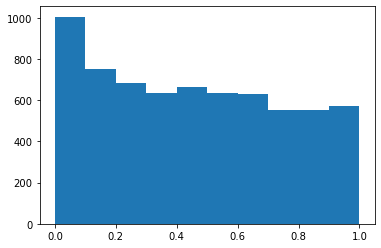

In [55]:
plt.hist(df['corr_pval'])

### Ad-hoc analysis

In [132]:
adata_ILC3 = adata.copy()[adata.obs.seurat_clusters==0].copy()


In [133]:
memento.create_groups(adata_ILC3, label_columns=['cell'])

In [134]:
memento.compute_1d_moments(adata_ILC3, min_perc_group=.7)


In [136]:
memento.compute_2d_moments(adata_ILC3, list(itertools.product(['Il22', 'Il17a'],adata_ILC3.var.index)))


In [138]:
meta_df = memento.get_groups(adata_ILC3)
meta_df['intercept'] = 1
covariate = meta_df[['intercept']]
treatment = meta_df[['cell']]

In [156]:
memento.ht_2d_moments(
    adata_ILC3, 
    covariate=covariate,
    treatment=treatment, 
    num_boot=5000, 
    verbose=1,
    num_cpus=14,
    resampling='bootstrap',
    resample_rep=False,
    approx=True)

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    3.6s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    6.9s
[Parallel(n_jobs=14)]: Done 422 tasks      | elapsed:   12.0s
[Parallel(n_jobs=14)]: Done 772 tasks      | elapsed:   19.0s
[Parallel(n_jobs=14)]: Done 1222 tasks      | elapsed:   27.9s
[Parallel(n_jobs=14)]: Done 1772 tasks      | elapsed:   38.6s
[Parallel(n_jobs=14)]: Done 2422 tasks      | elapsed:   51.4s
[Parallel(n_jobs=14)]: Done 3172 tasks      | elapsed:  1.1min
[Parallel(n_jobs=14)]: Done 4022 tasks      | elapsed:  1.4min
[Parallel(n_jobs=14)]: Done 4972 tasks      | elapsed:  1.7min
[Parallel(n_jobs=14)]: Done 6022 tasks      | elapsed:  2.0min
[Parallel(n_jobs=14)]: Done 7172 tasks      | elapsed:  2.4min
[Parallel(n_jobs=14)]: Done 8422 tasks      | elapsed:  2.7min
[Parallel(n_jobs=14)]: Done 9772 tasks      | elapsed:  3.0min
[Parallel(n_jobs=14)]: Done 11222 tasks      

In [157]:
df = memento.get_2d_ht_result(adata_ILC3)

(array([1151., 1408., 1533., 1512., 1415., 1424., 1384., 1343., 1321.,
        1297.]),
 array([1.74363337e-04, 1.00156330e-01, 2.00138297e-01, 3.00120264e-01,
        4.00102231e-01, 5.00084198e-01, 6.00066165e-01, 7.00048132e-01,
        8.00030099e-01, 9.00012066e-01, 9.99994033e-01]),
 <BarContainer object of 10 artists>)

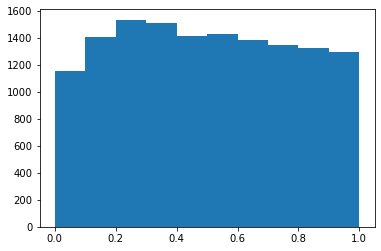

In [169]:
plt.hist(df['corr_pval'])

In [170]:
adata_ILC3

AnnData object with n_obs × n_vars = 2643 × 6895
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_HTO', 'nFeature_HTO', 'percent.mt', 'HTOsample', 'cell', 'seurat_clusters', 'Phase', 'q', 'memento_size_factor', 'memento_group'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'memento'

In [165]:
il22_tfs = df.query('gene_2 in @tfs & gene_1 == "Il22"').copy()#.sort_values('corr_pval')
il22_tfs['corr_fdr'] = memento.util._fdrcorrect(il22_tfs['corr_pval'])

In [168]:
il22_tfs.shape

(367, 6)

In [166]:
il22_tfs.head(5)

,gene_1,gene_2,corr_coef,corr_se,corr_pval,corr_fdr
13,Il22,Terf1,-0.008625,0.091202,0.924989,0.986834
28,Il22,Zfp451,0.199958,0.108941,0.069536,0.927509
38,Il22,Arid5a,0.063803,0.243483,0.793316,0.952145
75,Il22,Stat4,-0.155429,0.092635,0.095401,0.927509
76,Il22,Stat1,0.036000,0.111522,0.747427,0.952145


In [167]:
il22_tfs.sort_values('corr_pval')

,gene_1,gene_2,corr_coef,corr_se,corr_pval,corr_fdr
883,Il22,Nfatc2,-0.359577,0.122052,0.003219,0.927509
2136,Il22,Nrf1,-0.196099,0.071809,0.006662,0.927509
3951,Il22,Elk3,0.605254,0.232076,0.009203,0.927509
1458,Il22,Rlf,-0.379011,0.166973,0.023493,0.927509
1729,Il22,Fosl2,-0.143903,0.065654,0.028394,0.927509
3913,Il22,Hmg20b,-0.232663,0.104817,0.030086,0.927509
4321,Il22,Mnt,-0.357663,0.164935,0.031294,0.927509
5629,Il22,Nr4a1,-0.137611,0.063469,0.031489,0.927509
2343,Il22,Bhlhe40,-0.147977,0.071714,0.039072,0.927509
4492,Il22,Stat5b,-0.213587,0.103645,0.040146,0.927509


### Analysis 1 - Compare WT vs ZF7 mutant in ILC3s

For ILC3, do WT vs ZF7 1D comparison using memento.

Highlight some TFs within the DM (differential mean) genes.

In [128]:
adata.obs.groupby(['seurat_clusters', 'cell']).size()

seurat_clusters  cell
0                0       1524
                 1       1119
1                0       1521
                 1       1040
2                0       1458
                 1        946
3                0         88
                 1       2269
4                0        779
                 1       1213
5                0        144
                 1       1836
6                0        327
                 1       1197
7                0        168
                 1       1271
8                0        345
                 1        575
9                0        202
                 1        401
10               0        285
                 1        306
11               0         22
                 1        342
12               0        118
                 1        211
13               0         77
                 1        153
14               0         19
                 1        124
15               0          1
                 1         50
16               0

In [129]:
adata_ILC3 = adata.copy()[adata.obs.seurat_clusters==0].copy()
memento.create_groups(adata_ILC3, label_columns=['cell'])
memento.compute_1d_moments(adata_ILC3, min_perc_group=.7)
filtered_tfs = list(set(tfs) & set(adata_ILC3.var.index))

In [130]:
print('Il22' in adata_ILC3.var.index, 'Il17a' in adata_ILC3.var.index, 'Il17f' in adata_ILC3.var.index)

True True True


In [131]:
meta_df = memento.get_groups(adata_ILC3)
meta_df['intercept'] = 1
covariate = meta_df[['intercept']]
treatment = meta_df[['cell']]

In [33]:
memento.ht_1d_moments(
    adata_ILC3, 
    covariate=covariate,
    treatment=treatment, 
    num_boot=5000, 
    verbose=1,
    num_cpus=14,
    resampling='bootstrap',
    resample_rep=False,
    approx=False)

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=14)]: Done 316 tasks      | elapsed:    2.2s
[Parallel(n_jobs=14)]: Done 816 tasks      | elapsed:    4.8s
[Parallel(n_jobs=14)]: Done 1516 tasks      | elapsed:    8.8s
[Parallel(n_jobs=14)]: Done 2416 tasks      | elapsed:   13.9s
[Parallel(n_jobs=14)]: Done 3516 tasks      | elapsed:   20.3s
[Parallel(n_jobs=14)]: Done 4816 tasks      | elapsed:   28.0s
[Parallel(n_jobs=14)]: Done 6316 tasks      | elapsed:   36.9s
[Parallel(n_jobs=14)]: Done 6868 out of 6895 | elapsed:   40.2s remaining:    0.2s
[Parallel(n_jobs=14)]: Done 6895 out of 6895 | elapsed:   40.9s finished


In [34]:
res_1d = memento.get_1d_ht_result(adata_ILC3)
res_1d['de_fdr'] = memento.util._fdrcorrect(res_1d['de_pval'])
de_genes = res_1d.query('de_fdr < 0.05 & (de_coef < -0.5 | de_coef > 0.5)').sort_values('de_coef').gene.tolist()


In [35]:
res_1d.to_csv('A1_ILC_WTvsZF7.csv', index=False)

In [366]:
res_1d.query('gene =="Il17a"')

,gene,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,de_fdr
19,Il17a,cell,2.626801,0.164744,0.000015,-0.261514,0.14636,0.077784,0.01004


In [367]:
moments_1d = memento.get_1d_moments(adata_ILC3, groupby='cell')[0]

In [368]:
heatmap = pd.DataFrame(adata_norm.raw[adata_norm.obs.seurat_clusters==0, de_genes].X.todense(), columns=de_genes)
heatmap['genotype'] = adata_norm[adata_norm.obs.seurat_clusters==0].obs.cell.values

In [369]:
heatmap = heatmap.sort_values('genotype')#.drop('genotype', axis=1)
heatmap = heatmap.rolling(15, axis=0, min_periods=1).mean()
cell_labels = heatmap.genotype.values > 0.5
heatmap.drop('genotype', axis=1, inplace=True)

In [370]:
lut1 = dict(    zip(   set(cell_labels), sns.color_palette('Set2')[:2]   )   )
lut2 = dict(    zip(   set(cell_labels), sns.color_palette('Set2')[2:4]   )   )
cell_colors = pd.DataFrame(cell_labels)[0].map(lut1).tolist()

In [371]:
gene_labels = [True if g in tfs else False for g in heatmap.columns]
gene_colors = pd.DataFrame(gene_labels)[0].map(lut2).tolist()

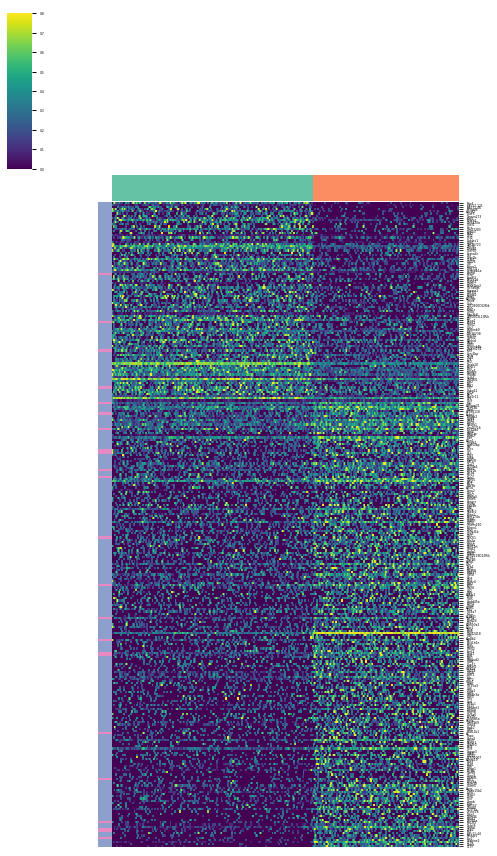

In [383]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'large',
         'xtick.labelsize':'small',
         'ytick.labelsize':3}
pylab.rcParams.update(params)
cg = sns.clustermap(
    heatmap.T, 
    standard_scale=0, 
    row_cluster=False, 
    col_cluster=False, 
    cmap='viridis', vmin=0, 
    vmax=0.8, xticklabels=False, 
    yticklabels=1, 
    col_colors=cell_colors,
    row_colors=gene_colors,
    figsize=(7,12))
ax = plt.gca()
ax.tick_params(width=1)
plt.show()
cg.savefig('ILC_WTvsZF7.png', dpi=300)

In [385]:
# 1l17 is upregulated in ZF7
res_1d.query('gene.str.contains("Il") & de_fdr < 0.05', engine='python')

,gene,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,de_fdr
19,Il17a,cell,2.626801,0.164744,0.000015,-0.261514,0.146360,0.077784,0.010040
20,Il17f,cell,3.921192,0.427061,0.000188,0.625858,0.925200,0.391722,0.012317
64,Il18r1,cell,-0.892702,0.110382,0.000060,-0.313576,0.524086,0.532294,0.010040
5388,Il7r,cell,-0.501407,0.053257,0.000022,0.112390,0.306038,0.714457,0.010040


In [387]:
# Transcription factors within the DE genes
res_1d.query('gene in @tfs & de_fdr < 0.05', engine='python').sort_values('de_coef')

,gene,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,de_fdr
1620,Rere,cell,-0.848067,0.245325,0.002496,-0.630462,0.345159,0.085983,0.039197
6226,Epas1,cell,-0.698339,0.172382,0.000690,0.048016,0.501379,0.922016,0.020770
6569,Klf9,cell,-0.592334,0.137729,0.000295,-0.022378,0.653548,0.966407,0.013660
4188,Tcf7,cell,-0.515510,0.130018,0.001016,-0.429609,0.413851,0.290142,0.025474
5629,Nr4a1,cell,-0.495154,0.051809,0.000042,-0.147761,0.163596,0.360528,0.010040
5521,Maff,cell,-0.490981,0.156303,0.002648,-0.952627,0.368230,0.013197,0.040326
6190,Tgif1,cell,-0.419627,0.109796,0.001213,0.642547,0.468915,0.157169,0.027689
1392,Jun,cell,-0.380914,0.037512,0.000017,-0.240865,0.114612,0.042791,0.010040
4198,Irf1,cell,-0.334376,0.083958,0.000531,-0.633089,0.425851,0.135573,0.017840
393,Atf3,cell,-0.310606,0.098293,0.002865,0.034157,0.270781,0.902020,0.041767


### Analysis 2 - Compare cluster3/5 vs 7/2 in WT and ZF7 cells separately

In [388]:
def compare_clusters(adata_subset):
    
    adata_subset.obs['group'] = adata_subset.obs['seurat_clusters'].apply(lambda x: 1 if x in [7,2] else 0)
    memento.create_groups(adata_subset, label_columns=['group'])
    memento.compute_1d_moments(adata_subset, min_perc_group=.7)
    
    meta_df = memento.get_groups(adata_subset)
    meta_df['intercept'] = 1
    covariate = meta_df[['intercept']]
    treatment = meta_df[['group']]
    
    memento.ht_1d_moments(
        adata_subset, 
        covariate=covariate,
        treatment=treatment, 
        num_boot=5000, 
        verbose=1,
        num_cpus=14,
        resampling='bootstrap',
        resample_rep=False,
        approx=False)
    return memento.get_1d_ht_result(adata_subset)

In [389]:
# WT cells
adata_wt = adata[adata.obs['seurat_clusters'].isin([3, 5, 7, 2]) & adata.obs.cell == 0].copy().copy()
wt_cluster_comparison = compare_clusters(adata_wt)

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    3.1s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    4.8s
[Parallel(n_jobs=14)]: Done 480 tasks      | elapsed:    7.8s
[Parallel(n_jobs=14)]: Done 1180 tasks      | elapsed:   14.8s
[Parallel(n_jobs=14)]: Done 2080 tasks      | elapsed:   24.5s
[Parallel(n_jobs=14)]: Done 3180 tasks      | elapsed:   35.2s
[Parallel(n_jobs=14)]: Done 4480 tasks      | elapsed:   48.6s
[Parallel(n_jobs=14)]: Done 5980 tasks      | elapsed:  1.1min
[Parallel(n_jobs=14)]: Done 6293 out of 6293 | elapsed:  1.1min finished


In [390]:
# ZF7 cells
adata_ZF7 = adata[adata.obs['seurat_clusters'].isin([3, 5, 7, 2]) & adata.obs.cell == 1].copy().copy()
ZF7_cluster_comparison = compare_clusters(adata_wt)

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.3s
[Parallel(n_jobs=14)]: Done 316 tasks      | elapsed:    3.6s
[Parallel(n_jobs=14)]: Done 816 tasks      | elapsed:    8.0s
[Parallel(n_jobs=14)]: Done 1516 tasks      | elapsed:   15.0s
[Parallel(n_jobs=14)]: Done 2416 tasks      | elapsed:   25.1s
[Parallel(n_jobs=14)]: Done 3516 tasks      | elapsed:   36.1s
[Parallel(n_jobs=14)]: Done 4816 tasks      | elapsed:   49.3s
[Parallel(n_jobs=14)]: Done 6266 out of 6293 | elapsed:  1.1min remaining:    0.3s
[Parallel(n_jobs=14)]: Done 6293 out of 6293 | elapsed:  1.1min finished


In [393]:
wt_cluster_comparison['de_fdr'] = memento.util._fdrcorrect(wt_cluster_comparison['de_pval'])
ZF7_cluster_comparison['de_fdr'] = memento.util._fdrcorrect(ZF7_cluster_comparison['de_pval'])

In [394]:
wt_cluster_comparison.to_csv('wt_cluster_comparison.csv', index=False)
ZF7_cluster_comparison.to_csv('ZF7_cluster_comparison.csv', index=False)

### Analysis 3 - Identify genes coexpressed with Il17a, Il17f, and Il22 in cluster 5 alone and cluster 3 alone.

Will analyze WT and ZF7 cells separately

In [22]:
def get_coexpressed_genes(adata_subset):
    
    adata_subset.obs['group'] = 1
    memento.create_groups(adata_subset, label_columns=['group'])
    memento.compute_1d_moments(adata_subset, min_perc_group=.7)
    memento.compute_2d_moments(adata_subset, list(itertools.product(['Il22', 'Il17a'],adata_subset.var.index)))
    
    meta_df = memento.get_groups(adata_subset)
    meta_df['intercept'] = 1
    covariate = meta_df[['intercept']]
    treatment = meta_df[['group']]
    
    memento.ht_2d_moments(
        adata_subset, 
        covariate=covariate,
        treatment=treatment, 
        num_boot=5000, 
        verbose=1,
        num_cpus=14,
        resampling='bootstrap',
        resample_rep=False,
        approx=False)
    res = memento.get_2d_ht_result(adata_subset)
    res['corr_fdr'] = memento.util._fdrcorrect(res['corr_pval'])
    return res

In [24]:
memento.setup_memento(adata, q_column='q', trim_percent=0.1, filter_mean_thresh=0.07)
c5_wt_result = get_coexpressed_genes(adata[adata.obs['seurat_clusters'].isin([5]) & adata.obs.cell == 0].copy().copy()).sort_values('corr_coef', ascending=False)
c5_wt_result.to_csv('A3_C5_WT_coex.csv', index=False)

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    4.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    9.3s
[Parallel(n_jobs=14)]: Done 422 tasks      | elapsed:   17.7s
[Parallel(n_jobs=14)]: Done 772 tasks      | elapsed:   30.0s
[Parallel(n_jobs=14)]: Done 1222 tasks      | elapsed:   45.4s
[Parallel(n_jobs=14)]: Done 1772 tasks      | elapsed:  1.1min
[Parallel(n_jobs=14)]: Done 2422 tasks      | elapsed:  1.6min
[Parallel(n_jobs=14)]: Done 3172 tasks      | elapsed:  2.2min
[Parallel(n_jobs=14)]: Done 3799 out of 3799 | elapsed:  2.7min finished


In [25]:
c3_wt_result = get_coexpressed_genes(adata[adata.obs['seurat_clusters'].isin([3]) & adata.obs.cell == 0].copy().copy()).sort_values('corr_coef', ascending=False)
c3_wt_result.to_csv('A3_C3_WT_coex.csv', index=False)

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    1.1s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    6.5s
[Parallel(n_jobs=14)]: Done 422 tasks      | elapsed:   15.5s
[Parallel(n_jobs=14)]: Done 772 tasks      | elapsed:   28.4s
[Parallel(n_jobs=14)]: Done 1222 tasks      | elapsed:   44.9s
[Parallel(n_jobs=14)]: Done 1772 tasks      | elapsed:  1.1min
[Parallel(n_jobs=14)]: Done 2422 tasks      | elapsed:  1.6min
[Parallel(n_jobs=14)]: Done 3172 tasks      | elapsed:  2.2min
[Parallel(n_jobs=14)]: Done 4022 tasks      | elapsed:  3.0min
[Parallel(n_jobs=14)]: Done 4059 out of 4059 | elapsed:  3.0min finished


In [26]:
c5_ZF7_result = get_coexpressed_genes(adata[adata.obs['seurat_clusters'].isin([5]) & adata.obs.cell == 1].copy().copy()).sort_values('corr_coef', ascending=False)
c5_ZF7_result.to_csv('A3_C5_ZF7_coex.csv', index=False)

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.5s
[Parallel(n_jobs=14)]: Done 316 tasks      | elapsed:    5.1s
[Parallel(n_jobs=14)]: Done 816 tasks      | elapsed:   12.7s
[Parallel(n_jobs=14)]: Done 1516 tasks      | elapsed:   23.6s
[Parallel(n_jobs=14)]: Done 2416 tasks      | elapsed:   37.9s
[Parallel(n_jobs=14)]: Done 3516 tasks      | elapsed:  1.0min
[Parallel(n_jobs=14)]: Done 4816 tasks      | elapsed:  1.6min
[Parallel(n_jobs=14)]: Done 5742 out of 5769 | elapsed:  1.9min remaining:    0.6s
[Parallel(n_jobs=14)]: Done 5769 out of 5769 | elapsed:  2.0min finished


In [27]:
c3_ZF7_result = get_coexpressed_genes(adata[adata.obs['seurat_clusters'].isin([3]) & adata.obs.cell == 1].copy().copy()).sort_values('corr_coef', ascending=False)
c3_ZF7_result.to_csv('A3_C5_ZF7_coex.csv', index=False)

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.5s
[Parallel(n_jobs=14)]: Done 316 tasks      | elapsed:    4.6s
[Parallel(n_jobs=14)]: Done 816 tasks      | elapsed:   11.5s
[Parallel(n_jobs=14)]: Done 1516 tasks      | elapsed:   21.5s
[Parallel(n_jobs=14)]: Done 2416 tasks      | elapsed:   41.2s
[Parallel(n_jobs=14)]: Done 3400 out of 3427 | elapsed:  1.1min remaining:    0.5s
[Parallel(n_jobs=14)]: Done 3427 out of 3427 | elapsed:  1.1min finished


In [42]:
c5_wt_result.sort_values('corr_coef', ascending=False).head(10)

,gene_1,gene_2,corr_coef,corr_se,corr_pval,corr_fdr
1938,Il17a,Ctla4,0.475393,0.016262,0.000109,0.003156
2661,Il17a,Furin,0.460953,0.019367,0.000061,0.002684
2784,Il17a,Maf,0.446187,0.018046,0.000058,0.002684
2242,Il17a,Tnfsf8,0.431334,0.025400,0.000014,0.001927
1906,Il17a,Il17f,0.424911,0.019660,0.000005,0.001381
2188,Il17a,Pde5a,0.391838,0.032851,0.000030,0.002161
2808,Il17a,Smco4,0.354840,0.028775,0.000025,0.002121
2103,Il17a,Tox2,0.350352,0.027845,0.000025,0.002121
3750,Il17a,Ndufa1,0.347101,0.016884,0.000186,0.003611
3196,Il17a,Hif1a,0.346629,0.021883,0.000004,0.001321


In [44]:
c3_wt_result.sort_values('corr_coef', ascending=False).head(10)

,gene_1,gene_2,corr_coef,corr_se,corr_pval,corr_fdr
2070,Il17a,Ctla4,0.404355,0.016832,0.000136,0.002679
2834,Il17a,Furin,0.378211,0.021293,0.000004,0.001293
2971,Il17a,Maf,0.366734,0.018523,0.000177,0.002757
2037,Il17a,Il17f,0.346943,0.022569,0.000006,0.001293
2246,Il17a,Tox2,0.327408,0.029070,0.000055,0.002167
4004,Il17a,Ndufa1,0.324593,0.019031,0.000006,0.001293
2995,Il17a,Smco4,0.321229,0.028224,0.000005,0.001293
2393,Il17a,Tnfsf8,0.312782,0.023027,0.000004,0.001293
2413,Il17a,Ybx1,0.307329,0.023916,0.000005,0.001293
3638,Il17a,Azin1,0.305014,0.032732,0.000378,0.003653


In [45]:
c5_ZF7_result.sort_values('corr_coef', ascending=False).head(10)

,gene_1,gene_2,corr_coef,corr_se,corr_pval,corr_fdr
2938,Il17a,Ctla4,0.459672,0.044684,0.000035,0.017707
2895,Il17a,Il17f,0.449882,0.047230,0.000018,0.017380
4853,Il17a,Id2,0.438264,0.050106,0.000027,0.017380
1322,Il22,Chd9,0.432062,0.159985,0.016797,0.227504
4235,Il17a,Maf,0.425271,0.049853,0.000005,0.017380
113,Il22,Csrp1,0.399338,0.219745,0.075585,0.434820
4744,Il17a,Gngt2,0.399187,0.110637,0.004399,0.108940
4032,Il17a,Picalm,0.394603,0.170628,0.040392,0.349054
4022,Il17a,Furin,0.391147,0.056824,0.000318,0.040755
4552,Il17a,Ifng,0.379298,0.058393,0.000140,0.027764


In [46]:
c3_ZF7_result.sort_values('corr_coef', ascending=False).head(10)

,gene_1,gene_2,corr_coef,corr_se,corr_pval,corr_fdr
2605,Il17a,Cxcr6,0.426988,0.066978,0.000091,0.056873
1752,Il17a,Ctla4,0.346523,0.047820,0.000952,0.085003
2524,Il17a,Ubl5,0.345903,0.124549,0.017596,0.243229
2500,Il17a,Maf,0.341698,0.051886,0.000145,0.056873
2543,Il17a,Cd3d,0.339846,0.073502,0.000468,0.066077
1992,Il17a,Pde5a,0.336321,0.085255,0.001937,0.103958
2876,Il17a,Id2,0.332777,0.055067,0.000103,0.056873
12,Il22,Zap70,0.323293,0.110874,0.008598,0.181944
2589,Il17a,Gpx1,0.322683,0.060994,0.000188,0.056873
1720,Il17a,Il17f,0.321300,0.039649,0.000037,0.042669


In [96]:
df = pd.read_csv('A3_C3_WT_coex.csv')#.query('gene_1 == "Il17a" & gene_2 == "Il22"')
df.query('gene_1 == "Il22" & gene_2 in @tfs').sort_values('corr_coef', ascending=False).head(10)

,gene_1,gene_2,corr_coef,corr_se,corr_pval,corr_fdr
101,Il22,Nfil3,0.189235,0.033382,0.000443,0.003804
125,Il22,Batf,0.178763,0.056293,0.002115,0.007886
165,Il22,Bhlhe40,0.164873,0.020240,0.000065,0.002186
176,Il22,Jun,0.162355,0.014148,0.000547,0.004090
180,Il22,Junb,0.161673,0.016618,0.000639,0.004368
243,Il22,Nfkbia,0.147501,0.019695,0.000136,0.002679
272,Il22,Atf3,0.143503,0.020246,0.000119,0.002661
281,Il22,Rora,0.141619,0.024151,0.000185,0.002761
290,Il22,Ybx1,0.140798,0.032268,0.000859,0.004886
386,Il22,Nr4a1,0.129996,0.019713,0.000102,0.002523


In [97]:
df = pd.read_csv('A3_C5_WT_coex.csv')#.query('gene_1 == "Il17a" & gene_2 == "Il22"')
df.query('gene_1 == "Il22" & gene_2 in @tfs').sort_values('corr_coef', ascending=False).head(10)

,gene_1,gene_2,corr_coef,corr_se,corr_pval,corr_fdr
96,Il22,Nfil3,0.175055,0.030688,0.000467,0.004742
118,Il22,Bhlhe40,0.164695,0.019551,0.000034,0.002199
129,Il22,Batf,0.160635,0.053312,0.002400,0.009704
131,Il22,Junb,0.159995,0.016165,0.000006,0.001381
161,Il22,Jun,0.152351,0.013312,0.000579,0.005069
181,Il22,Nfkbia,0.146008,0.019403,0.000085,0.002990
188,Il22,Rora,0.145013,0.023529,0.001093,0.006437
205,Il22,Ybx1,0.141794,0.035158,0.001146,0.006558
242,Il22,Nfatc3,0.134094,0.029600,0.000564,0.005065
247,Il22,Tox2,0.132329,0.029874,0.000925,0.005969


In [77]:
df = pd.read_csv('A3_C5_WT_coex.csv').query('gene_1 == "Il17a" & gene_2 == "Il22"')

In [78]:
df # WT

,gene_1,gene_2,corr_coef,corr_se,corr_pval,corr_fdr
144,Il17a,Il22,0.157231,0.018235,0.000051,0.002532
